# **Income Restricted Housing**

In this notebook, we will analyze income-restricted housing data to provide insights into two key issues for District 7:

- The number of income-restricted units and their growth over time.
- The number of units accepting Section 8 housing vouchers (affordable housing-approved units).

We will achieve this through the following tasks:

1. **Data Cleaning**: Handle missing values, remove duplicates, and ensure consistency in data formats using the dataset sourced from Analyze Boston.
2. **Data Understanding**: Review metadata to interpret the meaning of each column, focusing on attributes like zip code, neighborhood, and Section 8.
3. **Data Visualization**: Create plots to compare trends, analyze housing availability over time, and examine the differences between rental and ownership properties.
4. **Analysis and Insights**: Identify key patterns and provide insights that can inform policy or decision-making related to income-restricted housing.


In [1]:
# Import the necessary packages to process the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We start by loading the dataset directly from our public GitHub repository. This allows us to access the data seamlessly and ensures that our code remains reproducible for others.

In [2]:
# Load the data from the public github repo

income_2018 = pd.read_csv("../../data/income_restricted/income_restricted_2018.csv")
income_2020 = pd.read_csv("../../data/income_restricted/income_restricted_2020.csv")
income_2021 = pd.read_csv("../../data/income_restricted/income_restricted_2021.csv")
income_2022 = pd.read_csv("../../data/income_restricted/income_restricted_2022.csv")
income_2022.drop("_id", axis=1, inplace=True)

# Data Visualization and EDA

In [3]:
income_2018["Total Income- Restricted"] = pd.to_numeric(income_2018["Total Income- Restricted"], errors="coerce")
income_2020["Total Income- Restricted"] = pd.to_numeric(income_2020.get("Total Income- Restricted", 0), errors="coerce")
income_2021["Total Income-Restricted"] = pd.to_numeric(income_2021.get("Total Income-Restricted", 0), errors="coerce")
income_2022["Total Income-Restricted"] = pd.to_numeric(income_2022.get("Total Income-Restricted", 0), errors="coerce")

In [4]:
neighborhood_2018 = income_2018.groupby("Neighborhood").agg(
    Unique_Zip_Codes=("Zip Code", "nunique"),
    Count_of_Data_Points=("Zip Code", "count"),
    Total_Units = ("Total Income- Restricted", "sum")
).reset_index()

neighborhood_2020 = income_2020.groupby("Neighborhood").agg(
    Unique_Zip_Codes=("Zip Code", "nunique"),
    Count_of_Data_Points=("Zip Code", "count"),
    Total_Units = ("Total Income- Restricted", "sum")
).reset_index()

neighborhood_2021 = income_2021.groupby("Neighborhood").agg(
    Unique_Zip_Codes=("Zip Code", "nunique"),
    Count_of_Data_Points=("Zip Code", "count"),
    Total_Units = ("Total Income-Restricted", "sum")
).reset_index()

neighborhood_2022 = income_2022.groupby("Neighborhood").agg(
    Unique_Zip_Codes=("Zip Code", "nunique"),
    Count_of_Data_Points=("Zip Code", "count"),
    Total_Units = ("Total Income-Restricted", "sum")
).reset_index()

# Add a "Year" column to each DataFrame
neighborhood_2018["Year"] = 2018
neighborhood_2020["Year"] = 2020
neighborhood_2021["Year"] = 2021
neighborhood_2022["Year"] = 2022

# Concatenate all the data into one DataFrame
combined_data = pd.concat([neighborhood_2018, neighborhood_2020, neighborhood_2021, neighborhood_2022], ignore_index=True)

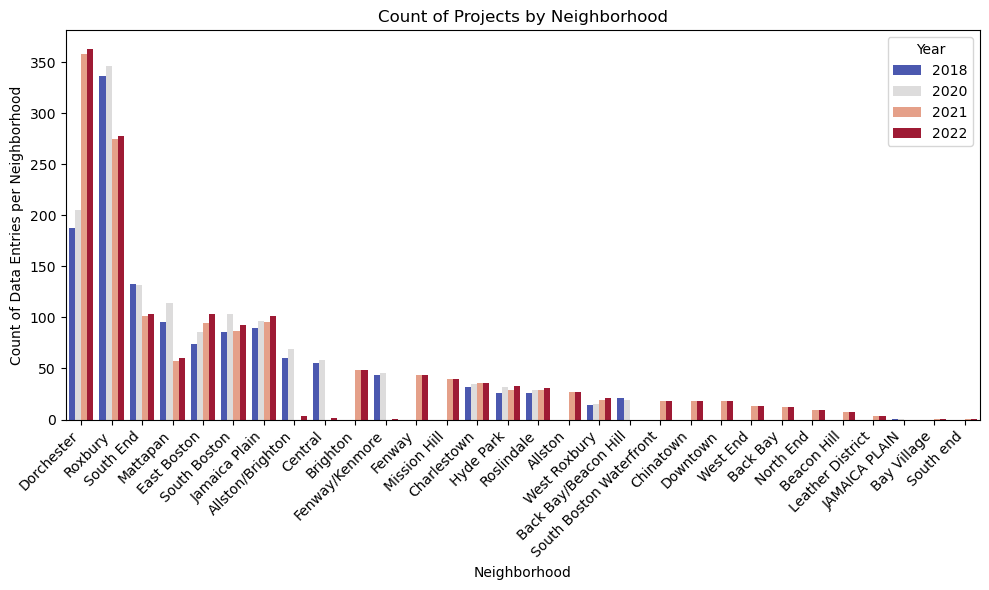

In [5]:
import seaborn as sns

combined_data_sorted = combined_data.sort_values(by="Count_of_Data_Points", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data_sorted, x="Neighborhood", y="Count_of_Data_Points", hue="Year", palette="coolwarm")
plt.title("Count of Projects by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count of Data Entries per Neighborhood")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

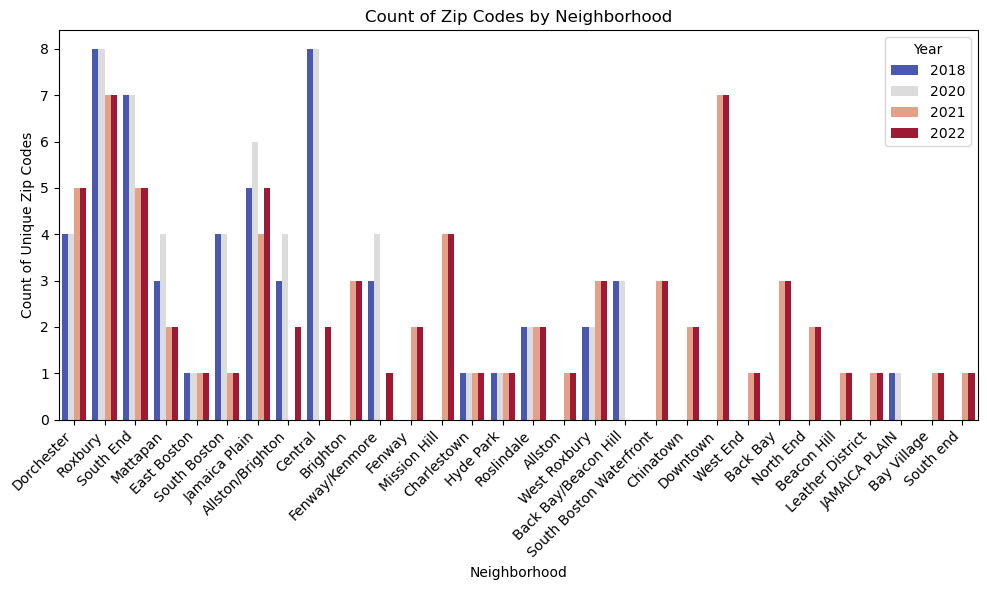

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data_sorted, x="Neighborhood", y="Unique_Zip_Codes", hue="Year", palette="coolwarm")
plt.title("Count of Zip Codes by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count of Unique Zip Codes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

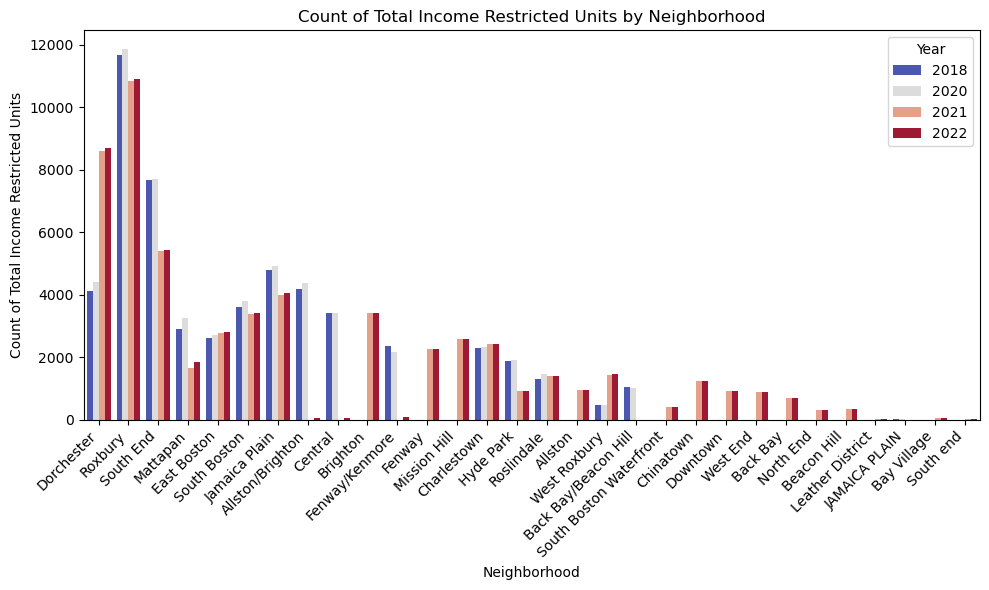

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data_sorted, x="Neighborhood", y="Total_Units", hue="Year", palette="coolwarm")
plt.title("Count of Total Income Restricted Units by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count of Total Income Restricted Units")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

# Data Cleaning

In [8]:
# Remove spaces and standardize column names across all DataFrames
income_2018["year"] = 2018
income_2020["year"] = 2020
income_2021["year"] = 2021
income_2022["year"] = 2022

income_2018.columns = income_2018.columns.str.strip().str.replace(" Restricted", "Restricted").str.replace(" Private", "Private").str.replace(" ", "-").str.lower()
income_2020.columns = income_2020.columns.str.strip().str.replace(" Restricted", "Restricted").str.replace(" Private", "Private").str.replace(" ", "-").str.lower()
income_2021.columns = income_2021.columns.str.strip().str.replace(" Restricted", "Restricted").str.replace(" Private", "Private").str.replace(" ", "-").str.lower()
income_2022.columns = income_2022.columns.str.strip().str.replace(" Restricted", "Restricted").str.replace(" Private", "Private").str.replace(" ", "-").str.lower()
income_2021.columns = income_2018.columns
income_2022.columns = income_2018.columns

dataframes = [income_2018, income_2020, income_2021, income_2022]

combined_income = pd.concat(dataframes, ignore_index=True)

In [9]:
def cleaning_zip(data):
    # Remove rows where 'zip-code' is missing
    data.dropna(subset=["zip-code"], inplace=True)
    
    # Convert 'zip-code' to integer type, then back to string type for consistency
    data["zip-code"] = data["zip-code"].astype(int).astype(str)
    
    # Pad 'zip-code' with leading zeros to ensure it is 5 digits long
    data["zip-code"] = data["zip-code"].str.zfill(5)
    
    return data


# Apply the cleaning_zip function to each DataFrame in the income_dfs list
combined_income = cleaning_zip(combined_income)

In [10]:
def map_neighborhood(x):
    # Check if the neighborhood string contains "Fenway" or "Roxbury"
    # If found, return the standardized neighborhood name
    if "Fenway" in x:
        return "Fenway"
    elif "Roxbury" in x:
        return "Roxbury"
    else:
        return x  # Return the original string if neither is found

def cleaning_neighborhood(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Remove rows where 'Neighborhood' is missing
    df.dropna(subset=["neighborhood"], inplace=True)
    
    # Apply the map_neighborhood function to standardize neighborhood names
    df["neighborhood"] = df["neighborhood"].apply(map_neighborhood)
    
    # Convert neighborhood names to lowercase and strip leading/trailing whitespace
    df["neighborhood"] = df["neighborhood"].str.lower().str.strip()
    
    # Filter the DataFrame to keep only specified neighborhoods
    df = df[df["neighborhood"].isin(["roxbury", "dorchester", "fenway", "south end"])]
    
    # Return the cleaned DataFrame
    return df

# List of specific ZIP codes to filter for in the DataFrames
zip_codes = ["02119", "02120", "02121", "02122", "02124", "02125", "02115", "02215", "02118"]

filtered_data = combined_income[combined_income["zip-code"].isin(zip_codes)]

cleaned_data = cleaning_neighborhood(filtered_data)
cleaned_data["section_8"] = cleaned_data["section_8"].apply(lambda x: 1 if x == "Y" else 0)
cleaned_data["year"] = cleaned_data["year"].astype(int)
cleaned_data["income-restricted-rental"] = cleaned_data["income-restricted-rental"].fillna(0).astype(int)
cleaned_data["income-restricted-ownership"] = cleaned_data["income-restricted-ownership"].fillna(0).astype(int)


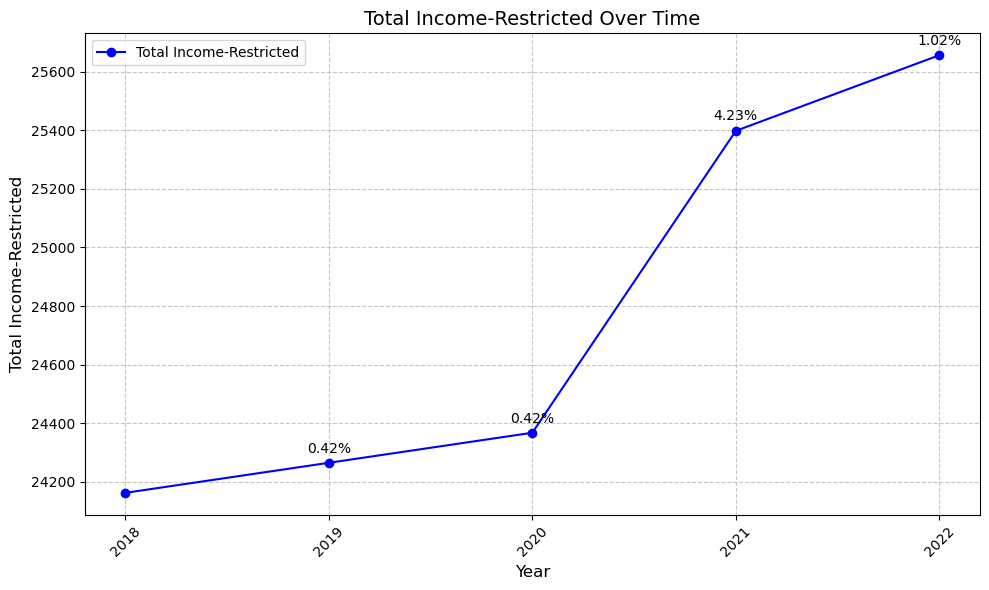

In [11]:
plotting_data = cleaned_data.groupby("year").agg({
        "total-income-restricted": "sum",
        "income-restricted-rental": "sum",
        "income-restricted-ownership": "sum",
        "section_8": "sum"
    }).reset_index()

data = plotting_data[(plotting_data["year"] == 2018) | (plotting_data["year"] == 2020)]

# Calculate the average
average_row = data.mean(numeric_only=True).to_dict()
average_row["year"] = 2019 

# Append the average row to the DataFrame
plotting_data = pd.concat([plotting_data, pd.DataFrame([average_row])], ignore_index=True)
plotting_data.sort_values(by="year", inplace=True)
plotting_data.reset_index(drop=True, inplace=True)

# Extract data for plotting
years = plotting_data["year"]
values = plotting_data["total-income-restricted"]

# Calculate percentage changes
percentage_changes = values.pct_change() * 100  

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker="o", linestyle="-", color="b", label="Total Income-Restricted")

# Add percentage change annotations
for i in range(1, len(years)):
    plt.text(
        years[i],
        values[i] + (0.001 * values[i]),  
        f"{percentage_changes.iloc[i]:.2f}%",
        fontsize=10,
        ha="center",
        va="bottom"
    )

# Customize plot
plt.title("Total Income-Restricted Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Income-Restricted", fontsize=12)
plt.xticks(years, rotation=45) 
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

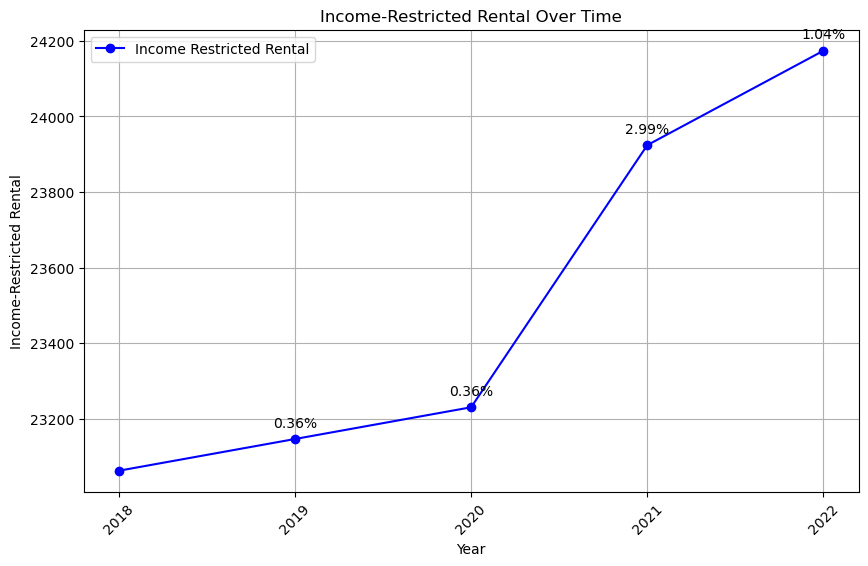

In [12]:
values = plotting_data["income-restricted-rental"]

# Calculate percentage changes
percentage_changes = values.pct_change() * 100 

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker="o", linestyle="-", color="b", label="Income Restricted Rental")

# Add percentage change annotations
for i in range(1, len(years)):
    plt.text(
        years[i],
        values[i] + (0.001 * values[i]),  
        f"{percentage_changes.iloc[i]:.2f}%",
        fontsize=10,
        ha="center",
        va="bottom"
    )

plt.title("Income-Restricted Rental Over Time")
plt.xlabel("Year")
plt.ylabel("Income-Restricted Rental")
plt.xticks(years, rotation=45) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

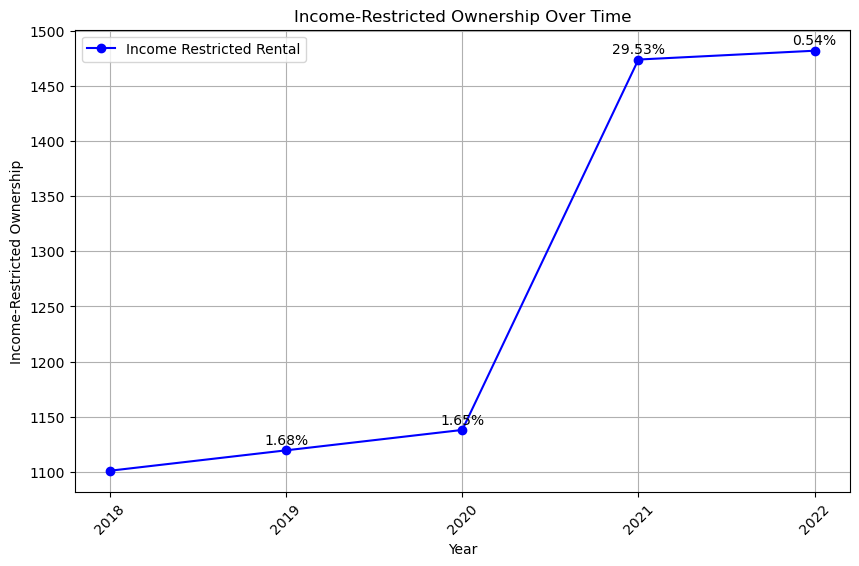

In [13]:
values = plotting_data["income-restricted-ownership"]

# Calculate percentage changes
percentage_changes = values.pct_change() * 100  # Convert to percentages

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker="o", linestyle="-", color="b", label="Income Restricted Rental")

# Add percentage change annotations
for i in range(1, len(years)):
    plt.text(
        years[i],
        values[i] + (0.002 * values[i]),  # Adjust annotation position
        f"{percentage_changes.iloc[i]:.2f}%",
        fontsize=10,
        ha="center",
        va="bottom"
    )
    
plt.title("Income-Restricted Ownership Over Time")
plt.xlabel("Year")
plt.ylabel("Income-Restricted Ownership")
plt.xticks(years, rotation=45) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

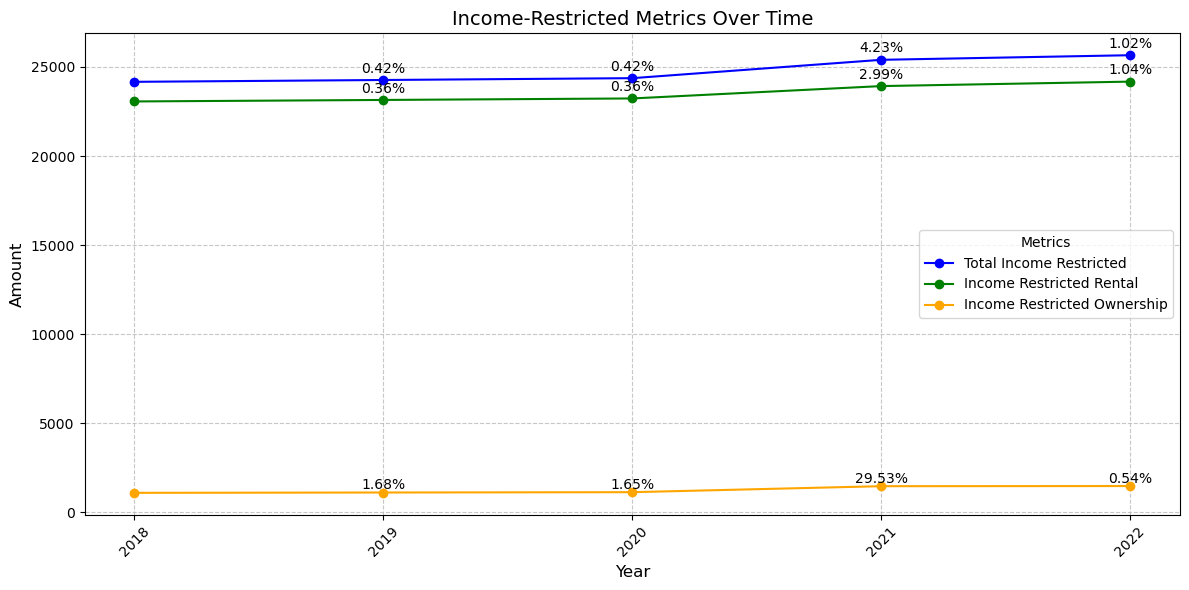

In [14]:
import matplotlib.pyplot as plt

# Extracting data for plotting
years = plotting_data["year"]

# Create a new figure
plt.figure(figsize=(12, 6))

# Define metrics and their corresponding colors
metrics = [
    "total-income-restricted",
    "income-restricted-rental",
    "income-restricted-ownership"
]
colors = ["blue", "green", "orange"]

# Loop through each metric and plot it
for metric, color in zip(metrics, colors):
    values = plotting_data[metric]
    # Calculate percentage changes
    percentage_changes = values.pct_change() * 100 

    # Plotting each metric
    plt.plot(years, values, marker="o", linestyle="-", color=color, label=metric.replace("-", " ").title())

    # Add percentage change annotations
    for i in range(1, len(years)):
        plt.text(
            years[i],
            values[i] + (0.01 * values[i]),
            f"{percentage_changes.iloc[i]:.2f}%",
            fontsize=10,
            ha="center",
            va="bottom"
        )

# Customize the overall plot
plt.title("Income-Restricted Metrics Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Metrics", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
combined_income[["income-restricted-rental", "income-restricted-ownership"]] = combined_income[["income-restricted-rental", "income-restricted-ownership"]].fillna(0).astype(float)
combined_income["section_8"] = combined_income["section_8"].apply(lambda x: 1 if x == "Y" else 0)

boston_data = combined_income.groupby("year").agg({
        "total-income-restricted": "sum",
        "income-restricted-rental": "sum",
        "income-restricted-ownership": "sum",
        "section_8": "sum"
    }).reset_index()

data = boston_data[(boston_data["year"] == 2018) | (boston_data["year"] == 2020)]

# Calculate the average
average_row = data.mean(numeric_only=True).to_dict()
average_row["year"] = 2019 

# Append the average row to the DataFrame
boston_data = pd.concat([boston_data, pd.DataFrame([average_row])], ignore_index=True)
boston_data.sort_values(by="year", inplace=True)
boston_data.reset_index(drop=True, inplace=True)
boston_data

,year,total-income-restricted,income-restricted-rental,income-restricted-ownership,section_8
0,2018,54203.0,51680.0,2523.0,201.0
1,2019,54986.0,52408.5,2577.5,203.0
2,2020,55769.0,53137.0,2632.0,205.0
3,2021,56798.0,53926.0,2872.0,206.0
4,2022,57531.0,54525.0,3006.0,206.0


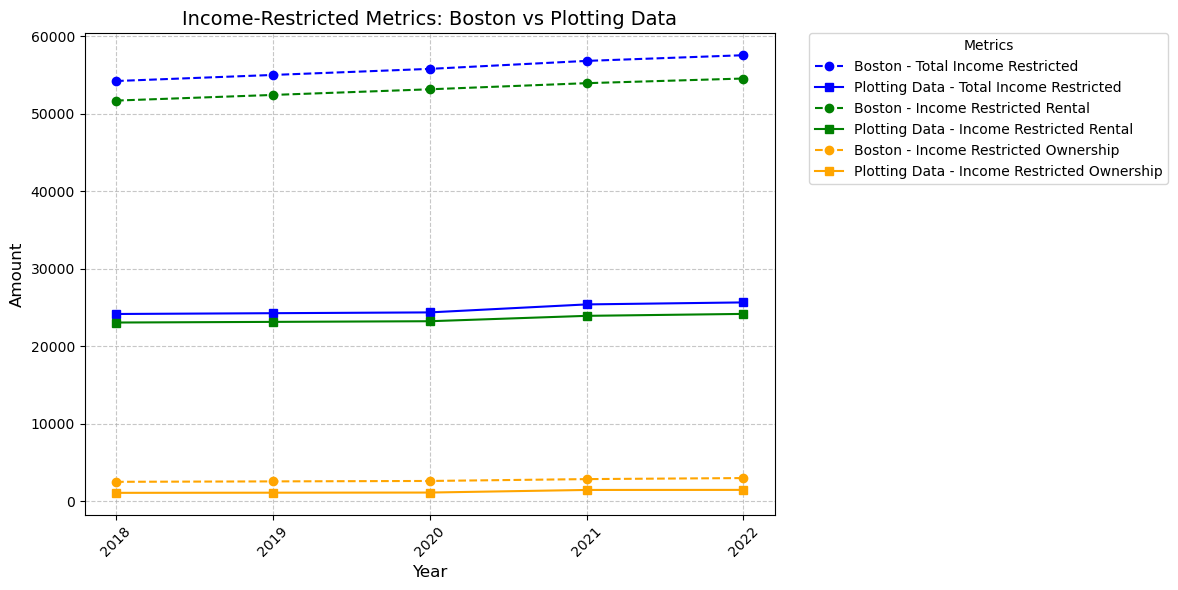

In [16]:
import matplotlib.pyplot as plt

# Define metrics and their corresponding colors
metrics = [
    "total-income-restricted",
    "income-restricted-rental",
    "income-restricted-ownership"
]
colors = ["blue", "green", "orange"]

# Extract years from both datasets
years_boston = boston_data["year"]
years_plotting = plotting_data["year"]

# Create a new figure
plt.figure(figsize=(12, 6))

# Loop through each metric and plot it for both datasets
for metric, color in zip(metrics, colors):
    # Plot Boston data
    boston_values = boston_data[metric]
    plt.plot(
        years_boston,
        boston_values,
        marker="o",
        linestyle="--",
        color=color,
        label=f"Boston - {metric.replace('-', ' ').title()}"
    )

    # Plot Plotting data
    plotting_values = plotting_data[metric]
    plt.plot(
        years_plotting,
        plotting_values,
        marker="s",  # Different marker for differentiation
        linestyle="-",
        color=color,
        label=f"Plotting Data - {metric.replace('-', ' ').title()}"
    )

# Customize the overall plot
plt.title("Income-Restricted Metrics: Boston vs Plotting Data", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(sorted(set(years_boston).union(set(years_plotting))), rotation=45)  # Combine unique years from both datasets
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Metrics", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)


# Show the plot
plt.tight_layout()
plt.show()


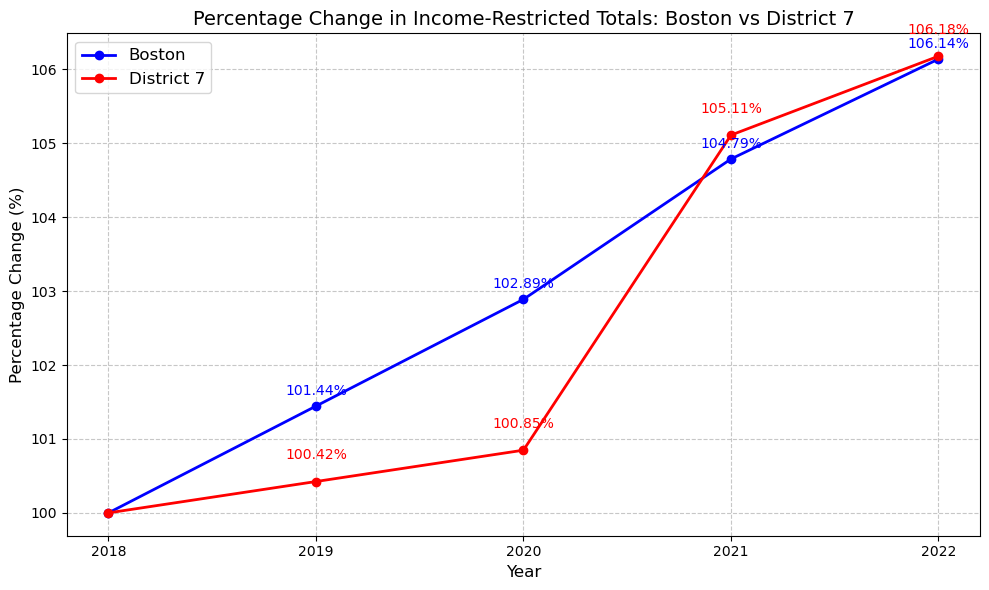

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize results with 100 for the first year
initial_value = 100

# Calculate percentage changes for both datasets
boston_percentage_changes = boston_data["total-income-restricted"].pct_change() * 100
district_7_percentage_changes = plotting_data["total-income-restricted"].pct_change() * 100

def calculate_cumulative_results(percentage_changes, years, initial_value=100):
    """
    Calculate cumulative results given percentage changes for a metric.
    """
    cumulative_results = [initial_value]
    for i in range(1, len(years)):
        cumulative_results.append(
            cumulative_results[i - 1] * (1 + percentage_changes.iloc[i] / 100)
        )
    return cumulative_results

# Calculate cumulative results
boston_cumulative_results = calculate_cumulative_results(boston_percentage_changes, years, initial_value)
district_7_cumulative_results = calculate_cumulative_results(district_7_percentage_changes, years, initial_value)

# Create DataFrames for plotting
boston_percentage_change = pd.DataFrame({
    "Year": years,
    "Percentage Change": boston_cumulative_results
})

district_7_percentage_change = pd.DataFrame({
    "Year": years,
    "Percentage Change": district_7_cumulative_results
})

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(boston_percentage_change["Year"], boston_percentage_change["Percentage Change"], 
         marker="o", linestyle="-", color="b", label="Boston", linewidth=2)

plt.plot(district_7_percentage_change["Year"], district_7_percentage_change["Percentage Change"], 
         marker="o", linestyle="-", color="r", label="District 7", linewidth=2)

# Add percentage annotations to the plot
def annotate_plot(data, color, offset, fontsize=10):

    for i in range(1, len(data)):
        plt.text(
            data["Year"].iloc[i], 
            data["Percentage Change"].iloc[i] + offset,
            f"{data['Percentage Change'].iloc[i]:.2f}%",
            ha="center", color=color, fontsize=fontsize
        )

annotate_plot(boston_percentage_change, color="b", offset=0.15)
annotate_plot(district_7_percentage_change, color="r", offset=0.3)

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)
plt.title("Percentage Change in Income-Restricted Totals: Boston vs District 7", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(years)
plt.tight_layout()
plt.show()

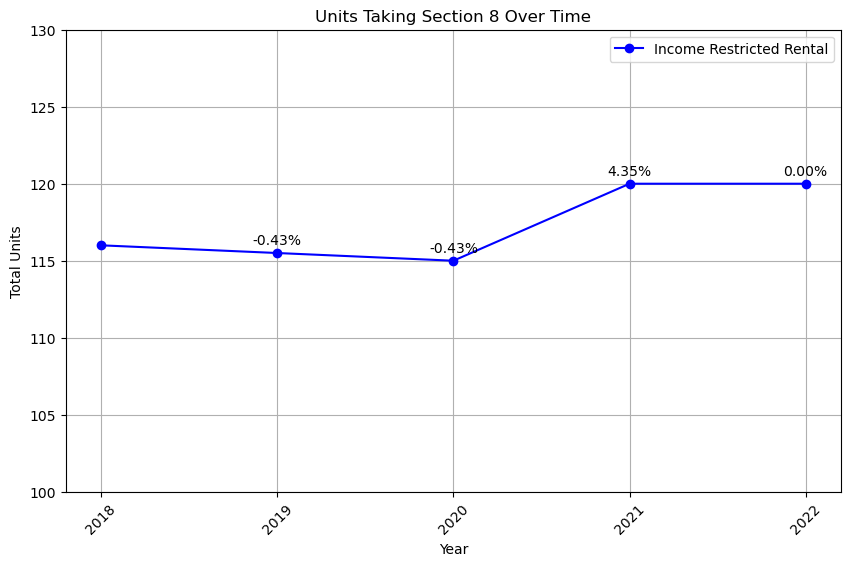

In [18]:
values = plotting_data["section_8"]

# Calculate percentage changes
percentage_changes = values.pct_change() * 100  # Convert to percentages

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker="o", linestyle="-", color="b", label="Income Restricted Rental")

# Add percentage change annotations
for i in range(1, len(years)):
    plt.text(
        years[i],
        values[i] + (0.003 * values[i]),  # Adjust annotation position
        f"{percentage_changes.iloc[i]:.2f}%",
        fontsize=10,
        ha="center",
        va="bottom"
    )

plt.title("Units Taking Section 8 Over Time")
plt.xlabel("Year")
plt.ylabel("Total Units")
plt.xticks(years, rotation=45) 
plt.grid(True)
plt.legend()
plt.ylim(100, 130)
plt.show()